In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [4]:
df = pd.read_csv("Stats.csv",index_col = 0)

In [5]:
df = df[1:]

In [6]:
len(df)

714

In [7]:
#Delete Outliers

In [8]:
df = df[df["Rating"] < 100]

In [9]:
len(df)

662

In [10]:
def proc(acc):
    acc = acc[:-1]
    return acc

In [11]:
df["Accuracy"] = df["Accuracy"].apply(proc).apply(float)

In [12]:
#It's fine

In [13]:
#sns.pairplot(df)

In [14]:
X = df.drop("Rating", axis = 1)
y = df["Rating"]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=110)

In [17]:
scaler = MinMaxScaler()

In [18]:
X_train

,Accuracy,Shot fired,Hits,Deaths,DMG_Get
127,10.2,1096,112,33,277
711,13.9,2768,385,50,549
690,18.9,2602,491,58,475
235,18.9,1532,289,35,285
406,18.0,1873,337,38,424
...,...,...,...,...,...
463,10.0,667,67,27,154
410,15.2,1587,242,53,525
294,13.8,1293,178,17,503
65,15.8,3220,509,36,435


In [19]:
X_train= scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [21]:
X_train.shape

(463, 5)

In [22]:
X_test.shape

(199, 5)

In [23]:
#Deep Learning

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [25]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
#model.add(Dense(6,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

In [26]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 52ms/step - loss: 40.9390 - val_loss: 39.7390
Epoch 2/200
4/4 [==============================] - 0s 9ms/step - loss: 40.9083 - val_loss: 39.7054
Epoch 3/200
4/4 [==============================] - 0s 9ms/step - loss: 40.8723 - val_loss: 39.6656
Epoch 4/200
4/4 [==============================] - 0s 10ms/step - loss: 40.8296 - val_loss: 39.6169
Epoch 5/200
4/4 [==============================] - 0s 10ms/step - loss: 40.7762 - val_loss: 39.5549
Epoch 6/200
4/4 [==============================] - 0s 9ms/step - loss: 40.7086 - val_loss: 39.4754
Epoch 7/200
4/4 [==============================] - 0s 9ms/step - loss: 40.6206 - val_loss: 39.3702
Epoch 8/200
4/4 [==============================] - 0s 9ms/step - loss: 40.5035 - val_loss: 39.2283
Epoch 9/200
4/4 [==============================] - 0s 9ms/step - loss: 40.3449 - val_loss: 39.0341
Epoch 10/200
4/4 [==============================] - 0s 9ms/step - loss: 40.1272 - val_loss: 38.7631
Epoch 

4/4 [==============================] - 0s 9ms/step - loss: 7.4287 - val_loss: 7.7730
Epoch 84/200
4/4 [==============================] - 0s 9ms/step - loss: 7.4170 - val_loss: 7.7693
Epoch 85/200
4/4 [==============================] - 0s 10ms/step - loss: 7.3931 - val_loss: 7.7299
Epoch 86/200
4/4 [==============================] - 0s 9ms/step - loss: 7.3886 - val_loss: 7.7705
Epoch 87/200
4/4 [==============================] - 0s 9ms/step - loss: 7.3748 - val_loss: 7.7785
Epoch 88/200
4/4 [==============================] - 0s 9ms/step - loss: 7.3663 - val_loss: 7.8216
Epoch 89/200
4/4 [==============================] - 0s 9ms/step - loss: 7.3639 - val_loss: 7.7932
Epoch 90/200
4/4 [==============================] - 0s 10ms/step - loss: 7.3686 - val_loss: 7.7566
Epoch 91/200
4/4 [==============================] - 0s 9ms/step - loss: 7.3549 - val_loss: 7.7270
Epoch 92/200
4/4 [==============================] - 0s 9ms/step - loss: 7.3200 - val_loss: 7.7518
Epoch 93/200
4/4 [=============

Epoch 166/200
4/4 [==============================] - 0s 10ms/step - loss: 6.9678 - val_loss: 7.7119
Epoch 167/200
4/4 [==============================] - 0s 9ms/step - loss: 6.9559 - val_loss: 7.7273
Epoch 168/200
4/4 [==============================] - 0s 9ms/step - loss: 7.0015 - val_loss: 7.6784
Epoch 169/200
4/4 [==============================] - 0s 10ms/step - loss: 6.9706 - val_loss: 7.6867
Epoch 170/200
4/4 [==============================] - 0s 10ms/step - loss: 6.9304 - val_loss: 7.7150
Epoch 171/200
4/4 [==============================] - 0s 9ms/step - loss: 6.9567 - val_loss: 7.7165
Epoch 172/200
4/4 [==============================] - 0s 9ms/step - loss: 6.9838 - val_loss: 7.6903
Epoch 173/200
4/4 [==============================] - 0s 9ms/step - loss: 6.9919 - val_loss: 7.7057
Epoch 174/200
4/4 [==============================] - 0s 9ms/step - loss: 6.9114 - val_loss: 7.6793
Epoch 175/200
4/4 [==============================] - 0s 9ms/step - loss: 7.0271 - val_loss: 7.6715
Epoch 1

In [27]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

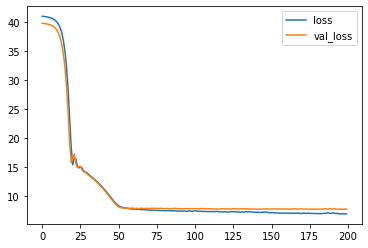

In [28]:
losses.plot()

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [41]:
X_test

array([[ 0.17086835,  0.55048327,  0.17125588,  0.12068966,  0.19980601],
       [ 0.10084034,  0.12565056,  0.03022163,  0.01724138,  0.27837051],
       [ 0.28011204,  0.52579926,  0.2659503 ,  0.56034483,  0.22599418],
       [ 0.7254902 ,  0.16936803,  0.26460712,  0.32758621,  0.40640155],
       [ 0.26330532,  0.33501859,  0.16856951,  0.25      ,  0.17555771],
       [ 0.33333333,  0.1602974 ,  0.11685695,  0.60344828,  0.24830262],
       [ 0.17086835,  0.15494424,  0.05910007,  0.39655172,  0.29485936],
       [ 0.53781513,  0.08773234,  0.12424446,  0.38793103,  0.11542192],
       [ 0.46218487,  0.34750929,  0.30355944,  0.56034483,  0.45392823],
       [ 0.37535014, -0.0132342 ,  0.02484889,  0.14655172,  0.43743938],
       [ 0.44257703,  0.19717472,  0.18132975,  0.03448276,  0.38797284],
       [ 0.39495798,  0.27167286,  0.2095366 ,  0.29310345,  0.15130941],
       [ 0.40336134,  0.13412639,  0.12424446,  0.42241379,  0.15906887],
       [ 0.55462185,  0.22795539,  0.2

In [30]:
predictions = model.predict(X_test)

7/7 [==============================] - 0s 1ms/step


In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.670006673180279
MSE: 102.23969734049963
RMSE: 10.111364761519566


In [37]:
tf.keras.models.save_model(model,"model_6.hdf5")

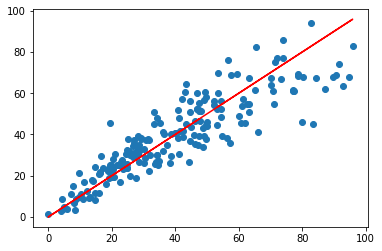

In [32]:
# Our predictions
plt.scatter(y_test,predictions)

# Real Value
plt.plot(y_test,y_test,'r')

In [ ]:
#Cheated Model

In [43]:
#Project Output

In [44]:
import numpy as np

In [45]:
y_test.values.reshape(len(X_test))
df1 = pd.DataFrame(y_test.values.reshape(len(X_test),1))
df2 = pd.DataFrame(predictions)
df3 = pd.DataFrame(X_test)
df12 = pd.concat([df1,df2], axis = 1)

In [46]:
data = pd.DataFrame(X_test)
data = data.reset_index()
data = data.drop("index", axis = 1)
data

,0,1,2,3,4
0,0.320313,0.196214,0.154623,0.290598,0.318497
1,0.403646,0.141327,0.150738,0.239316,0.076162
2,0.247396,0.318168,0.181818,0.324786,0.803165
3,0.367188,0.184326,0.168609,0.128205,0.167161
4,0.716146,0.753596,1.158508,0.735043,0.406528
...,...,...,...,...,...
210,0.177083,0.234811,0.100233,0.282051,0.134520
211,0.101562,0.239654,0.058275,0.042735,0.537092
212,0.414062,0.264456,0.258741,0.222222,0.186944
213,0.505208,0.100675,0.146853,0.384615,0.127596


In [47]:
final = pd.concat([data,df12],axis = 1)
final.columns = ['Accuracy', 'Shot fired', 'Hits', 'Deaths',"DMG_Get", 'Rating', "Predictions"]
final.drop(['Accuracy', 'Shot fired', 'Hits', 'Deaths',"DMG_Get"],axis = 1,inplace=True)
final

,Rating,Predictions
0,24.8,30.935850
1,27.9,36.575108
2,28.5,26.312502
3,34.6,45.615032
4,86.5,100.032249
...,...,...
210,13.6,16.091570
211,31.7,17.089045
212,53.0,55.433735
213,43.7,35.296402


In [48]:
final["Diff"] = final["Rating"] - final["Predictions"]

In [49]:
final

,Rating,Predictions,Diff
0,24.8,30.935850,-6.135850
1,27.9,36.575108,-8.675108
2,28.5,26.312502,2.187498
3,34.6,45.615032,-11.015032
4,86.5,100.032249,-13.532249
...,...,...,...
210,13.6,16.091570,-2.491570
211,31.7,17.089045,14.610955
212,53.0,55.433735,-2.433735
213,43.7,35.296402,8.403598


In [50]:
len(final[abs(final["Diff"]) < 5]) / len(final) * 100

50.23255813953489

In [147]:
#almost 70% of predictions miss less than 5